In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# visualization tools
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings("ignore")

In [7]:
# reading CSV using Pandas and storing in dataframe       
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

### **Separating Features and Labels**

In [8]:
X=df.iloc[:, 0:12]
X.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


In [9]:
y=df.iloc[:,-1]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: DEATH_EVENT, dtype: int64

### **Splitting Dataset into Training Set and Testing Set**

**Standardize Data**

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X)

X = pd.DataFrame(X_train, columns=X.columns)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **Functions**

In [12]:
results_classication_df = pd.DataFrame(data=[['Test', 0, 1, 2, 3]], 
                            columns=['Model', 'Accuracy', 'F1_Score', 'Precision', 'Recall'])

In [13]:
def modelPerformace(test_value, pred_value, model_name, new_table):
  print("Test Result:\n================================================")
  # Accuracy Score
  from sklearn import metrics
  test_acc_score = metrics.accuracy_score(test_value,pred_value)
  print('Accuracy Score:', test_acc_score)

  # F1 Score
  from sklearn.metrics import  f1_score
  test_f_score = f1_score(test_value, pred_value, average='weighted',labels=np.unique(pred_value))
  print("F1 Score:", test_f_score)

  # Precision
  from sklearn.metrics import precision_score
  test_pre_score = precision_score(test_value, pred_value, average='weighted',labels=np.unique(pred_value))
  print("Precision:",test_pre_score)

  # Recall
  from sklearn.metrics import recall_score
  test_recall_score = recall_score(test_value, pred_value, average='weighted',labels=np.unique(pred_value))
  print("Recall:",test_recall_score)

  if(new_table):
    global results_classication_df
    results_classication_df = pd.DataFrame(data=[[model_name, test_acc_score, test_f_score, test_pre_score, test_recall_score]], 
                            columns=['Model', 'Accuracy', 'F1_Score', 'Precision', 'Recall'])
  else:
    results = pd.DataFrame(data=[[model_name, test_acc_score, test_f_score, test_pre_score, test_recall_score]], 
                          columns=['Model', 'Accuracy', 'F1_Score', 'Precision', 'Recall'])
    results_classication_df = results_classication_df.append(results, ignore_index=True)

  print()
  # Confusion Matrix
  from sklearn.metrics import confusion_matrix
  %matplotlib inline
  cm = confusion_matrix(test_value, pred_value)
  f,ax = plt.subplots(figsize=(5, 5))
  sns.heatmap(cm, annot=True, linewidths=0.5,linecolor="red", fmt= '.0f',ax=ax)
  plt.title('Confusion Matrix ' + model_name)
  plt.show()

In [14]:
def naiveBayesModel(X, y, test):
  from sklearn.naive_bayes import GaussianNB
  classifier = GaussianNB()
  classifier.fit(X, y)
  return classifier.predict(test)

In [15]:
def logisticRegressionModel(X, y, test):
  from sklearn.linear_model import LogisticRegression
  classifierLogisticRegression = LogisticRegression(random_state=0)
  classifierLogisticRegression.fit(X, y)
  return classifierLogisticRegression.predict(test)

In [16]:
def SVCModel(X, y, test):
  from sklearn.svm import SVC
  classifierSVC = SVC(kernel='linear', C=0.01)
  classifierSVC.fit(X, y)
  return classifierSVC.predict(test)

In [17]:
def randomForestModel(X, y, test):
  from sklearn.ensemble import RandomForestClassifier
  classifierRandomForest = RandomForestClassifier(n_estimators = 10, random_state = 0)
  classifierRandomForest.fit(X, y)
  return classifierRandomForest.predict(test)

In [18]:
def getKValue(inputlist):
    min_value = min(inputlist)
    min_index = inputlist.index(min_value)
    return min_index + 1

def KNNModel(X, y, X_test, y_test):
  from sklearn.neighbors import KNeighborsClassifier
  k=[i for i in range(1,20)]

  from sklearn.metrics import accuracy_score
  accuracyArrayKNN=[]
  for i in k:
      knn = KNeighborsClassifier(n_neighbors=i)
      knn.fit(X, y)
      y_pred = knn.predict(X_test)
      accuracyArrayKNN.append(accuracy_score(y_test, y_pred))
  plt.xlabel("Value of K")
  plt.ylabel("Accuracy")
  plt.title("Accuracy vs K Value")
  plt.plot(k,accuracyArrayKNN,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
  plt.show()

  print()

  error=[(1-i) for i in accuracyArrayKNN]
  plt.xlabel("Value of K")
  plt.ylabel("Error Rate")
  plt.title("Error rate vs K Value")
  plt.plot(k,error,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
  plt.show()

  print()

  n_Neighbor = getKValue(error)
  print('Error rate lowest for K value is:' + str(n_Neighbor))

  classifierKNeighbors = KNeighborsClassifier(n_neighbors=n_Neighbor)
  classifierKNeighbors.fit(X, y)
  return classifierKNeighbors.predict(X_test)

In [19]:
def NNModel(X, y, test, dim):
  from keras.models import Sequential
  from keras.layers import Dense
  model = Sequential()
  model.add(Dense(30, input_dim=dim, activation='relu'))
  model.add(Dense(20, activation='relu'))
  model.add(Dense(1, activation='relu'))
  model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
  model.fit(X, y, epochs=200, verbose=1, batch_size=10)
  
  return np.argmax(model.predict(test), axis=1)

## **Classification I**

**Naive Bayes Model**

In [20]:
y_pred = naiveBayesModel(X_train, y_train, X_test)

Test Result:
Accuracy Score: 0.7
F1 Score: 0.6666666666666666
Precision: 0.7337662337662337
Recall: 0.7



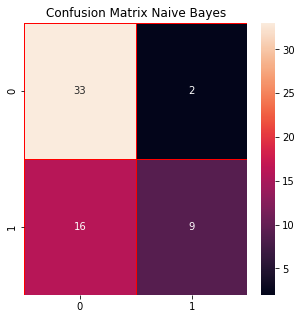

In [21]:
modelPerformace(y_test, y_pred, 'Naive Bayes', True)

**Logistic Regression Model**

In [22]:
y_pred_logidtic = logisticRegressionModel(X_train, y_train, X_test)

Test Result:
Accuracy Score: 0.7166666666666667
F1 Score: 0.680952380952381
Precision: 0.7716666666666666
Recall: 0.7166666666666667



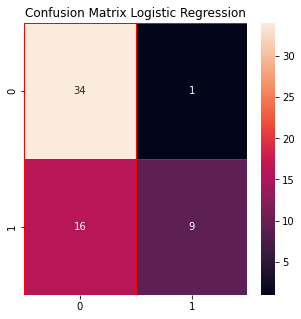

In [23]:
modelPerformace(y_test, y_pred_logidtic, 'Logistic Regression', False)

**Support Vector Machine Model**

In [24]:
y_pred_SVC = SVCModel(X_train, y_train, X_test)

Test Result:
Accuracy Score: 0.5833333333333334
F1 Score: 0.7368421052631579
Precision: 0.5833333333333334
Recall: 1.0



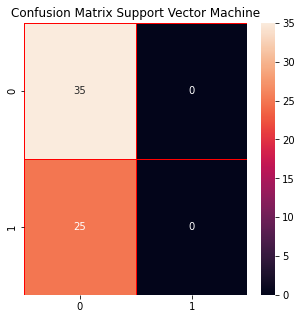

In [25]:
modelPerformace(y_test, y_pred_SVC, 'Support Vector Machine', False)

**Random Forest Model**

In [26]:
y_pred_RandomForest = randomForestModel(X_train, y_train, X_test)

Test Result:
Accuracy Score: 0.75
F1 Score: 0.7256593943340931
Precision: 0.7951388888888888
Recall: 0.75



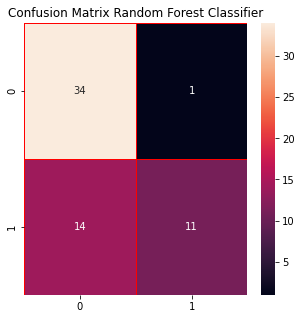

In [27]:
modelPerformace(y_test, y_pred_RandomForest, 'Random Forest Classifier', False)

**K Nearest Neighbors Model**

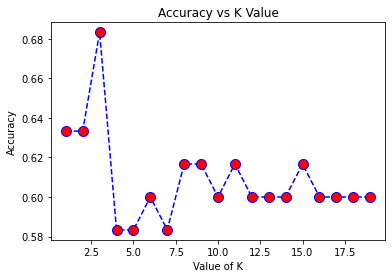

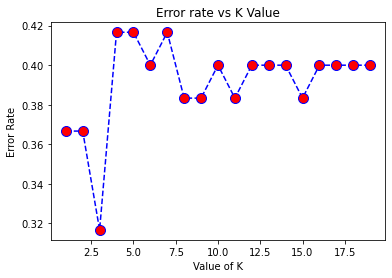


Error rate lowest for K value is:3


In [28]:
y_pred_KNeighbors = KNNModel(X_train, y_train, X_test, y_test)

Test Result:
Accuracy Score: 0.6833333333333333
F1 Score: 0.6327063740856843
Precision: 0.7459935897435898
Recall: 0.6833333333333333



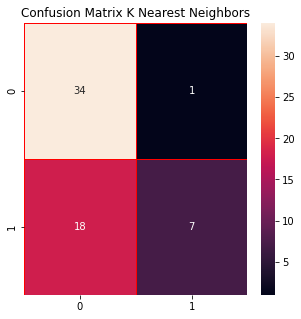

In [29]:
modelPerformace(y_test, y_pred_KNeighbors, 'K Nearest Neighbors', False)

**Multi-Layer Perceptron Neural Networks Model**

In [30]:
NNX = np.array(X)
NNy = np.array(y)

In [31]:
# create X and Y datasets for training
from sklearn import model_selection
NNX_train, NNX_test, NNy_train, NNy_test = model_selection.train_test_split(NNX, NNy, stratify=NNy, random_state=42, test_size = 0.2)

In [32]:
nn_pred = NNModel(NNX_train, NNy_train, NNX_test, 12)

Epoch 1/200
24/24 [==============================] - 1s 1ms/step - loss: 0.7159 - accuracy: 0.6778
Epoch 2/200
24/24 [==============================] - 0s 802us/step - loss: 0.6040 - accuracy: 0.6904
Epoch 3/200
24/24 [==============================] - 0s 907us/step - loss: 0.5711 - accuracy: 0.6820
Epoch 4/200
24/24 [==============================] - 0s 1ms/step - loss: 0.5492 - accuracy: 0.6904
Epoch 5/200
24/24 [==============================] - 0s 1ms/step - loss: 0.5287 - accuracy: 0.7238
Epoch 6/200
24/24 [==============================] - 0s 1ms/step - loss: 0.5065 - accuracy: 0.7490
Epoch 7/200
24/24 [==============================] - 0s 989us/step - loss: 0.4907 - accuracy: 0.7615
Epoch 8/200
24/24 [==============================] - 0s 1ms/step - loss: 0.4810 - accuracy: 0.7866
Epoch 9/200
24/24 [==============================] - 0s 1ms/step - loss: 0.4678 - accuracy: 0.8033
Epoch 10/200
24/24 [==============================] - 0s 878us/step - loss: 0.4547 - accuracy: 0.8033
E

24/24 [==============================] - 0s 879us/step - loss: 0.2230 - accuracy: 0.8828
Epoch 82/200
24/24 [==============================] - 0s 925us/step - loss: 0.1932 - accuracy: 0.8996
Epoch 83/200
24/24 [==============================] - 0s 784us/step - loss: 0.1923 - accuracy: 0.9205
Epoch 84/200
24/24 [==============================] - 0s 1ms/step - loss: 0.1872 - accuracy: 0.9121
Epoch 85/200
24/24 [==============================] - 0s 902us/step - loss: 0.1905 - accuracy: 0.9079
Epoch 86/200
24/24 [==============================] - 0s 975us/step - loss: 0.1941 - accuracy: 0.9038
Epoch 87/200
24/24 [==============================] - 0s 2ms/step - loss: 0.1842 - accuracy: 0.9163
Epoch 88/200
24/24 [==============================] - 0s 1ms/step - loss: 0.1838 - accuracy: 0.9205
Epoch 89/200
24/24 [==============================] - 0s 1ms/step - loss: 0.1830 - accuracy: 0.9205
Epoch 90/200
24/24 [==============================] - 0s 910us/step - loss: 0.1859 - accuracy: 0.9163
E

24/24 [==============================] - 0s 833us/step - loss: 0.1081 - accuracy: 0.9582
Epoch 162/200
24/24 [==============================] - 0s 999us/step - loss: 0.1044 - accuracy: 0.9456
Epoch 163/200
24/24 [==============================] - 0s 994us/step - loss: 0.1029 - accuracy: 0.9414
Epoch 164/200
24/24 [==============================] - 0s 1ms/step - loss: 0.0986 - accuracy: 0.9456
Epoch 165/200
24/24 [==============================] - 0s 867us/step - loss: 0.1040 - accuracy: 0.9540
Epoch 166/200
24/24 [==============================] - 0s 947us/step - loss: 0.0988 - accuracy: 0.9498
Epoch 167/200
24/24 [==============================] - 0s 906us/step - loss: 0.1007 - accuracy: 0.9331
Epoch 168/200
24/24 [==============================] - 0s 936us/step - loss: 0.1031 - accuracy: 0.9582
Epoch 169/200
24/24 [==============================] - 0s 775us/step - loss: 0.1238 - accuracy: 0.9289
Epoch 170/200
24/24 [==============================] - 0s 817us/step - loss: 0.0991 - acc

Test Result:
Accuracy Score: 0.6833333333333333
F1 Score: 0.8118811881188118
Precision: 0.6833333333333333
Recall: 1.0



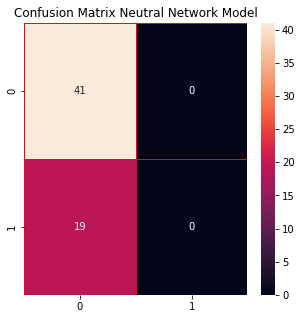

In [33]:
modelPerformace(NNy_test, nn_pred, 'Neutral Network Model', False)

In [34]:
results_classication_df

,Model,Accuracy,F1_Score,Precision,Recall
0,Naive Bayes,0.700000,0.666667,0.733766,0.700000
1,Logistic Regression,0.716667,0.680952,0.771667,0.716667
2,Support Vector Machine,0.583333,0.736842,0.583333,1.000000
3,Random Forest Classifier,0.750000,0.725659,0.795139,0.750000
4,K Nearest Neighbors,0.683333,0.632706,0.745994,0.683333
5,Neutral Network Model,0.683333,0.811881,0.683333,1.000000


## **Classification II**


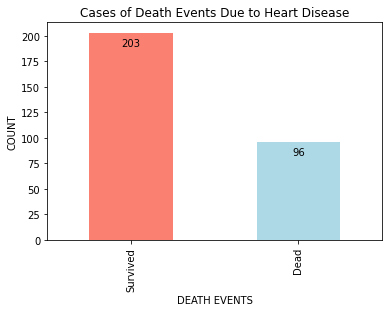

In [35]:
# Plot the value_counts with a bar graph
ax = df.DEATH_EVENT.value_counts().plot(kind="bar", color=["salmon", "lightblue"])
plt.xticks([0,1],['Survived', 'Dead'])
plt.title('Cases of Death Events Due to Heart Disease');

ax.set_xlabel("DEATH EVENTS")
ax.set_ylabel("COUNT")
for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = -15
    label = "{:.0f}".format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')
plt.show()

### **Under Sampling Technique**

In [36]:
from imblearn.under_sampling import RandomUnderSampler

In [37]:
underSampler = RandomUnderSampler(random_state=11)

In [38]:
X_underSampler, y_underSampler = underSampler.fit_resample(X, y)

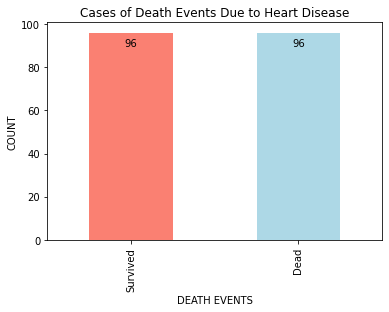

In [39]:
ax = y_underSampler.value_counts().plot(kind="bar", color=["salmon", "lightblue"]);
plt.xticks([0,1],['Survived', 'Dead'])
plt.title('Cases of Death Events Due to Heart Disease');

ax.set_xlabel("DEATH EVENTS")
ax.set_ylabel("COUNT")
for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = -15
    label = "{:.0f}".format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')
plt.show()

**Splitting Balanced Dataset into Training Set and Testing Set**

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_underSampler, y_underSampler, test_size=0.2, random_state=42)

**Naive Bayes Model**

In [41]:
y_pred = naiveBayesModel(X_train, y_train, X_test)

Test Result:
Accuracy Score: 0.7692307692307693
F1 Score: 0.7677095481973532
Precision: 0.7922240802675585
Recall: 0.7692307692307693



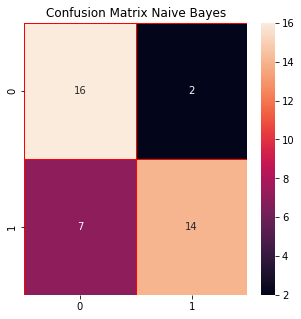

In [42]:
modelPerformace(y_test, y_pred, 'Naive Bayes', True)

**Logistic Regression Model**

In [43]:
y_pred_logidtic = logisticRegressionModel(X_train, y_train, X_test)

Test Result:
Accuracy Score: 0.8461538461538461
F1 Score: 0.8432274247491639
Precision: 0.8593406593406595
Recall: 0.8461538461538461



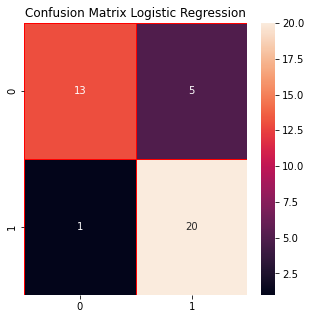

In [44]:
modelPerformace(y_test, y_pred_logidtic, 'Logistic Regression', False)

**Support Vector Machine Model**

In [45]:
y_pred_SVC = SVCModel(X_train, y_train, X_test)

Test Result:
Accuracy Score: 0.46153846153846156
F1 Score: 0.631578947368421
Precision: 0.46153846153846156
Recall: 1.0



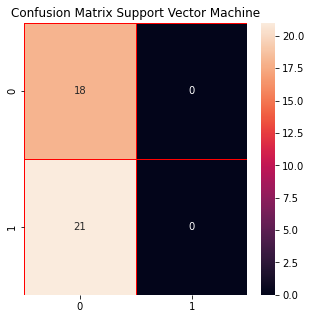

In [46]:
modelPerformace(y_test, y_pred_SVC, 'Support Vector Machine', False)

**Random Forest Model**

In [47]:
y_pred_RandomForest = randomForestModel(X_train, y_train, X_test)

Test Result:
Accuracy Score: 0.8974358974358975
F1 Score: 0.8974358974358975
Precision: 0.8974358974358975
Recall: 0.8974358974358975



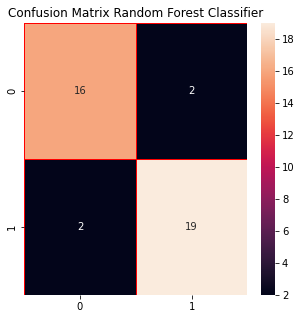

In [48]:
modelPerformace(y_test, y_pred_RandomForest, 'Random Forest Classifier', False)

**K Nearest Neighbors Model**

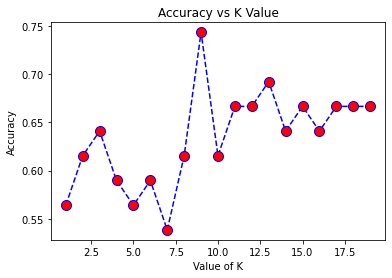

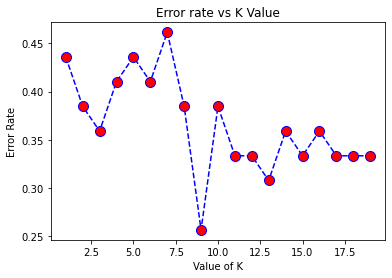


Error rate lowest for K value is:9


In [49]:
y_pred_KNeighbors = KNNModel(X_train, y_train, X_test, y_test)

Test Result:
Accuracy Score: 0.7435897435897436
F1 Score: 0.7439271255060729
Precision: 0.7481781376518217
Recall: 0.7435897435897436



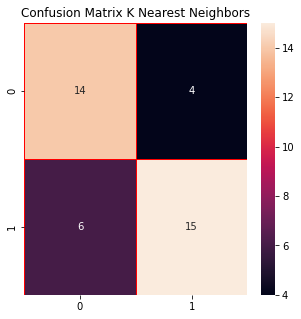

In [50]:
modelPerformace(y_test, y_pred_KNeighbors, 'K Nearest Neighbors', False)

**Multi-Layer Perceptron Neural Networks Model**

In [51]:
NNX = np.array(X_underSampler)
NNy = np.array(y_underSampler)

In [52]:
# create X and Y datasets for training
from sklearn import model_selection
NNX_train, NNX_test, NNy_train, NNy_test = model_selection.train_test_split(NNX, NNy, stratify=NNy, random_state=42, test_size = 0.2)

In [53]:
nn_pred = NNModel(NNX_train, NNy_train, NNX_test, 12)

Epoch 1/200
16/16 [==============================] - 1s 2ms/step - loss: 1.5287 - accuracy: 0.5294
Epoch 2/200
16/16 [==============================] - 0s 991us/step - loss: 0.9353 - accuracy: 0.5359
Epoch 3/200
16/16 [==============================] - 0s 1ms/step - loss: 0.8133 - accuracy: 0.5686
Epoch 4/200
16/16 [==============================] - 0s 1ms/step - loss: 0.7755 - accuracy: 0.5425
Epoch 5/200
16/16 [==============================] - 0s 1ms/step - loss: 0.7481 - accuracy: 0.5621
Epoch 6/200
16/16 [==============================] - 0s 1ms/step - loss: 0.7297 - accuracy: 0.6078
Epoch 7/200
16/16 [==============================] - 0s 1ms/step - loss: 0.7118 - accuracy: 0.6078
Epoch 8/200
16/16 [==============================] - 0s 1ms/step - loss: 0.6920 - accuracy: 0.6144
Epoch 9/200
16/16 [==============================] - 0s 1ms/step - loss: 0.6723 - accuracy: 0.6209
Epoch 10/200
16/16 [==============================] - 0s 1ms/step - loss: 0.6555 - accuracy: 0.6144
Epoch 1

16/16 [==============================] - 0s 998us/step - loss: 0.2023 - accuracy: 0.9020
Epoch 83/200
16/16 [==============================] - 0s 715us/step - loss: 0.1976 - accuracy: 0.9085
Epoch 84/200
16/16 [==============================] - 0s 1ms/step - loss: 0.1996 - accuracy: 0.9085
Epoch 85/200
16/16 [==============================] - 0s 698us/step - loss: 0.1955 - accuracy: 0.9085
Epoch 86/200
16/16 [==============================] - 0s 1ms/step - loss: 0.1903 - accuracy: 0.9150
Epoch 87/200
16/16 [==============================] - 0s 1ms/step - loss: 0.1924 - accuracy: 0.9085
Epoch 88/200
16/16 [==============================] - 0s 1ms/step - loss: 0.1853 - accuracy: 0.9085
Epoch 89/200
16/16 [==============================] - 0s 953us/step - loss: 0.1899 - accuracy: 0.9216
Epoch 90/200
16/16 [==============================] - 0s 1ms/step - loss: 0.1848 - accuracy: 0.9281
Epoch 91/200
16/16 [==============================] - 0s 1ms/step - loss: 0.1841 - accuracy: 0.9150
Epoch

16/16 [==============================] - 0s 998us/step - loss: 0.0899 - accuracy: 0.9608
Epoch 163/200
16/16 [==============================] - 0s 981us/step - loss: 0.0921 - accuracy: 0.9673
Epoch 164/200
16/16 [==============================] - 0s 1ms/step - loss: 0.0902 - accuracy: 0.9673
Epoch 165/200
16/16 [==============================] - 0s 970us/step - loss: 0.0862 - accuracy: 0.9673
Epoch 166/200
16/16 [==============================] - 0s 938us/step - loss: 0.0910 - accuracy: 0.9673
Epoch 167/200
16/16 [==============================] - 0s 958us/step - loss: 0.0899 - accuracy: 0.9673
Epoch 168/200
16/16 [==============================] - 0s 990us/step - loss: 0.0836 - accuracy: 0.9804
Epoch 169/200
16/16 [==============================] - 0s 1ms/step - loss: 0.0925 - accuracy: 0.9608
Epoch 170/200
16/16 [==============================] - 0s 872us/step - loss: 0.0832 - accuracy: 0.9739
Epoch 171/200
16/16 [==============================] - 0s 994us/step - loss: 0.0900 - accur

Test Result:
Accuracy Score: 0.5128205128205128
F1 Score: 0.6779661016949152
Precision: 0.5128205128205128
Recall: 1.0



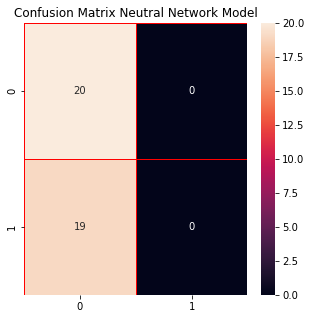

In [54]:
modelPerformace(NNy_test, nn_pred, 'Neutral Network Model', False)

In [55]:
results_classication_df

,Model,Accuracy,F1_Score,Precision,Recall
0,Naive Bayes,0.769231,0.767710,0.792224,0.769231
1,Logistic Regression,0.846154,0.843227,0.859341,0.846154
2,Support Vector Machine,0.461538,0.631579,0.461538,1.000000
3,Random Forest Classifier,0.897436,0.897436,0.897436,0.897436
4,K Nearest Neighbors,0.743590,0.743927,0.748178,0.743590
5,Neutral Network Model,0.512821,0.677966,0.512821,1.000000


### **SMOTE**

In [56]:
from imblearn.over_sampling import SMOTE

In [57]:
smote = SMOTE(random_state = 14)

In [58]:
X_smote, y_smote = smote.fit_resample(X, y)

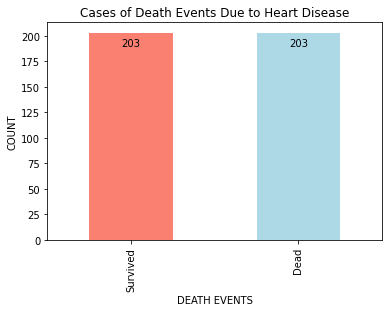

In [59]:
ax = y_smote.value_counts().plot(kind="bar", color=["salmon", "lightblue"]);
plt.xticks([0,1],['Survived', 'Dead'])
plt.title('Cases of Death Events Due to Heart Disease');

ax.set_xlabel("DEATH EVENTS")
ax.set_ylabel("COUNT")
for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = -15
    label = "{:.0f}".format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')
plt.show()

**Splitting Balanced Dataset into Training Set and Testing Set**

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

**Naive Bayes Model**

In [61]:
y_pred = naiveBayesModel(X_train, y_train, X_test)

Test Result:
Accuracy Score: 0.8170731707317073
F1 Score: 0.8168279970215934
Precision: 0.81877990430622
Recall: 0.8170731707317073



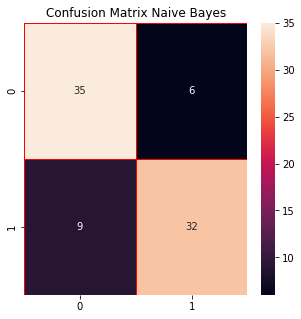

In [62]:
modelPerformace(y_test, y_pred, 'Naive Bayes', True)

**Logistic Regression Model**

In [63]:
y_pred_logidtic = logisticRegressionModel(X_train, y_train, X_test)

Test Result:
Accuracy Score: 0.7804878048780488
F1 Score: 0.7803571428571429
Precision: 0.7811568276684557
Recall: 0.7804878048780488



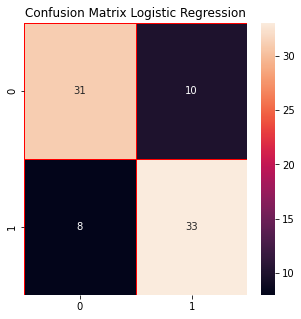

In [64]:
modelPerformace(y_test, y_pred_logidtic, 'Logistic Regression', False)

**Support Vector Machine Model**

In [65]:
y_pred_SVC = SVCModel(X_train, y_train, X_test)

Test Result:
Accuracy Score: 0.7073170731707317
F1 Score: 0.7073170731707317
Precision: 0.7073170731707317
Recall: 0.7073170731707317



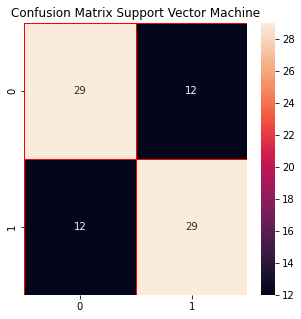

In [66]:
modelPerformace(y_test, y_pred_SVC, 'Support Vector Machine', False)

**Random Forest Model**

In [67]:
y_pred_RandomForest = randomForestModel(X_train, y_train, X_test)

Test Result:
Accuracy Score: 0.8414634146341463
F1 Score: 0.8412509307520478
Precision: 0.8433014354066987
Recall: 0.8414634146341463



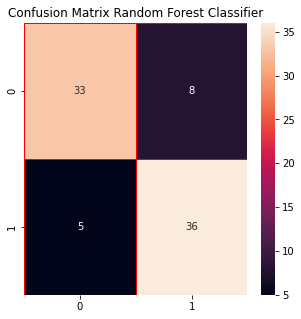

In [68]:
modelPerformace(y_test, y_pred_RandomForest, 'Random Forest Classifier', False)

**K Nearest Neighbors Model**

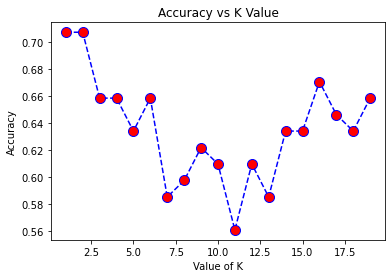

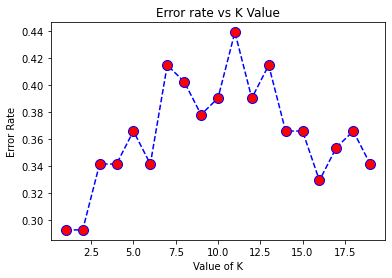


Error rate lowest for K value is:1


In [69]:
y_pred_KNeighbors = KNNModel(X_train, y_train, X_test, y_test)

Test Result:
Accuracy Score: 0.7073170731707317
F1 Score: 0.7073170731707317
Precision: 0.7073170731707317
Recall: 0.7073170731707317



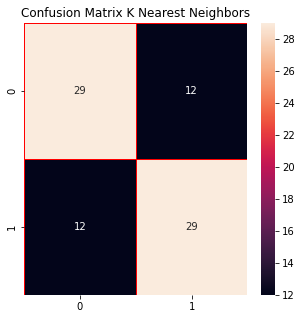

In [70]:
modelPerformace(y_test, y_pred_KNeighbors, 'K Nearest Neighbors', False)

**Multi-Layer Perceptron Neural Networks Model**

In [71]:
NNX = np.array(X_smote)
NNy = np.array(y_smote)

In [72]:
# create X and Y datasets for training
from sklearn import model_selection
NNX_train, NNX_test, NNy_train, NNy_test = model_selection.train_test_split(NNX, NNy, stratify=NNy, random_state=42, test_size = 0.2)

In [73]:
nn_pred = NNModel(NNX_train, NNy_train, NNX_test, 12)

Epoch 1/200
33/33 [==============================] - 1s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/200
33/33 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/200
33/33 [==============================] - 0s 814us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/200
33/33 [==============================] - 0s 860us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/200
33/33 [==============================] - 0s 836us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/200
33/33 [==============================] - 0s 880us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/200
33/33 [==============================] - 0s 783us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/200
33/33 [==============================] - 0s 840us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/200
33/33 [==============================] - 0s 807us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/200
33/33 [==============================] - 0s 808us/step - loss: 7.7125 - accuracy: 

33/33 [==============================] - 0s 826us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 82/200
33/33 [==============================] - 0s 865us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 83/200
33/33 [==============================] - 0s 860us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 84/200
33/33 [==============================] - 0s 808us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 85/200
33/33 [==============================] - 0s 762us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 86/200
33/33 [==============================] - 0s 831us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 87/200
33/33 [==============================] - 0s 913us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 88/200
33/33 [==============================] - 0s 770us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 89/200
33/33 [==============================] - 0s 770us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 90/200
33/33 [==============================] - 0s 834us/step - loss: 7.7125 - accuracy: 

33/33 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 162/200
33/33 [==============================] - 0s 871us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 163/200
33/33 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 164/200
33/33 [==============================] - 0s 871us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 165/200
33/33 [==============================] - 0s 867us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 166/200
33/33 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 167/200
33/33 [==============================] - 0s 871us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 168/200
33/33 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 169/200
33/33 [==============================] - 0s 810us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 170/200
33/33 [==============================] - 0s 991us/step - loss: 7.7125 - accuracy:

Test Result:
Accuracy Score: 0.5
F1 Score: 0.6666666666666666
Precision: 0.5
Recall: 1.0



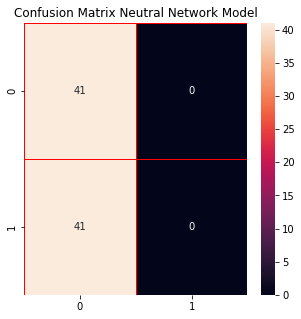

In [74]:
modelPerformace(NNy_test, nn_pred, 'Neutral Network Model', False)

In [75]:
results_classication_df

,Model,Accuracy,F1_Score,Precision,Recall
0,Naive Bayes,0.817073,0.816828,0.818780,0.817073
1,Logistic Regression,0.780488,0.780357,0.781157,0.780488
2,Support Vector Machine,0.707317,0.707317,0.707317,0.707317
3,Random Forest Classifier,0.841463,0.841251,0.843301,0.841463
4,K Nearest Neighbors,0.707317,0.707317,0.707317,0.707317
5,Neutral Network Model,0.500000,0.666667,0.500000,1.000000


## **Feature Selection**

In [76]:
X.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,0.636364,0.0,0.071319,0.0,0.090909,1.0,0.290823,0.157303,0.485714,1.0,0.0,0.000000
1,0.272727,0.0,1.000000,0.0,0.363636,0.0,0.288833,0.067416,0.657143,1.0,0.0,0.007117
2,0.454545,0.0,0.015693,0.0,0.090909,0.0,0.165960,0.089888,0.457143,1.0,1.0,0.010676
3,0.181818,1.0,0.011227,0.0,0.090909,0.0,0.224148,0.157303,0.685714,1.0,0.0,0.010676
4,0.454545,1.0,0.017479,1.0,0.090909,0.0,0.365984,0.247191,0.085714,0.0,0.0,0.014235


**Chi-Square Test**

In [77]:
from sklearn.feature_selection import chi2

In [78]:
X_chi = X
y_chi = y

In [79]:
chi_scores = chi2(X_chi,y_chi)

In [80]:
chi_scores
# here first array represents chi square values and second array represnts p-values

(array([2.36884557e+00, 7.46593411e-01, 2.52028846e-01, 6.56814450e-04,
        1.89451597e+00, 1.22153853e+00, 3.50213632e-02, 3.47161030e+00,
        2.67367929e-01, 1.95626598e-03, 3.23468288e-02, 1.40502858e+01]),
 array([1.23778556e-01, 3.87556925e-01, 6.15650114e-01, 9.79553740e-01,
        1.68693443e-01, 2.69058926e-01, 8.51550901e-01, 6.24305076e-02,
        6.05102877e-01, 9.64721312e-01, 8.57268569e-01, 1.77986782e-04]))

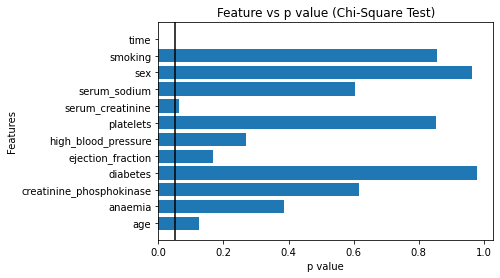

<Figure size 2160x720 with 0 Axes>

In [81]:
plt.barh(X_chi.columns, chi_scores[1])
plt.axvline(x = .05, color = 'black', label = 'axvline - full height')
plt.ylabel("Features")
plt.xlabel("p value")
plt.title("Feature vs p value (Chi-Square Test)")
plt.figure(figsize =(30, 10))
plt.show()

**Mann-Whitney Test**

In [82]:
import scipy.stats as stats
X_manWhite = X
y_manWhite = y

In [83]:
manWhite_scores = stats.mannwhitneyu(x=X_manWhite, y=y_manWhite)

In [84]:
manWhite_scores
# here first array represents Mann-Whitney values and second array represnts p-values

MannwhitneyuResult(statistic=array([60082.5, 49634. , 60643.5, 49036. , 60643.5, 46046. , 60595.5,
       60595.5, 60643.5, 59351.5, 44700.5, 60643.5]), pvalue=array([8.43621467e-14, 5.38607134e-03, 1.16017274e-14, 1.41069075e-02,
       1.11515569e-14, 4.36468281e-01, 1.41576386e-14, 1.37058871e-14,
       1.13878264e-14, 1.13144026e-15, 1.00000000e+00, 1.17762525e-14]))

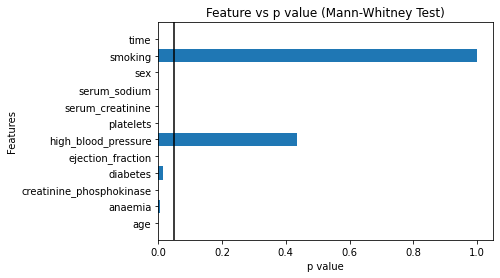

<Figure size 2160x720 with 0 Axes>

In [85]:
plt.barh(X_manWhite.columns, manWhite_scores[1])
plt.axvline(x = .05, color = 'black', label = 'axvline - full height')
plt.ylabel("Features")
plt.xlabel("p value")
plt.title("Feature vs p value (Mann-Whitney Test)")
plt.figure(figsize =(30, 10))
plt.show()

**Co-relation Graph**

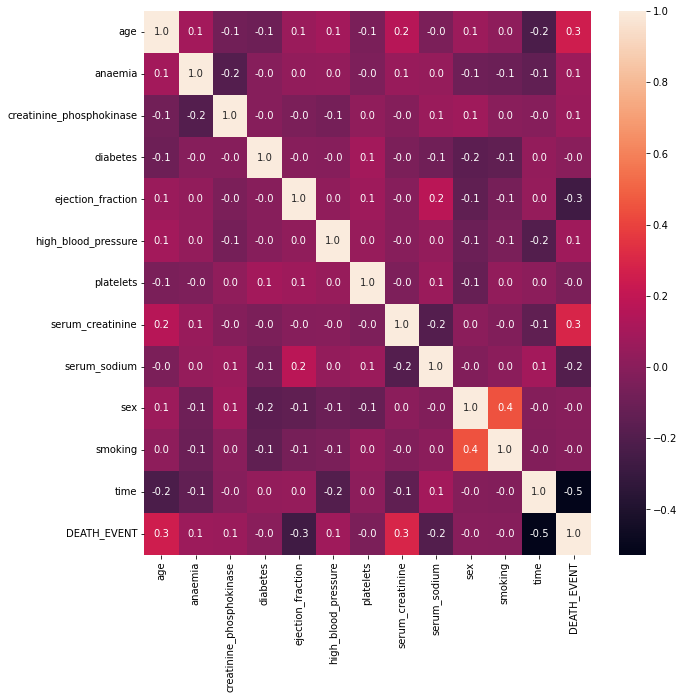

In [86]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt='.1f')
plt.show()

**Feature Importance Plot**

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X_underSampler, y_underSampler, test_size=0.2, random_state=42)

In [88]:
from sklearn.ensemble import RandomForestClassifier
 
forest = RandomForestClassifier(n_estimators=500, random_state=1)
# Train the mode
forest.fit(X_train, y_train.values.ravel())

RandomForestClassifier(n_estimators=500, random_state=1)

In [89]:
importances = forest.feature_importances_
# Sort the feature importance in descending order
sorted_indices = np.argsort(importances)[::-1]
 
feat_labels = df.columns
 
for f in range(11):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[sorted_indices[f]],
                            importances[sorted_indices[f]]))

 1) time                           0.294433
 2) serum_creatinine               0.182997
 3) ejection_fraction              0.134770
 4) age                            0.098388
 5) serum_sodium                   0.084732
 6) platelets                      0.073864
 7) creatinine_phosphokinase       0.072278
 8) high_blood_pressure            0.013065
 9) anaemia                        0.011613
10) smoking                        0.011601
11) diabetes                       0.011187


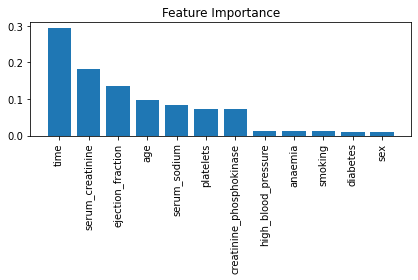

In [90]:
import matplotlib.pyplot as plt
 
plt.title('Feature Importance')
plt.bar(range(X_manWhite.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_manWhite.shape[1]), X_manWhite.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

## **Classification III**

In [91]:
X = X_underSampler.drop(['anaemia', 'high_blood_pressure'], axis=1)

In [92]:
X.head()

,age,creatinine_phosphokinase,diabetes,ejection_fraction,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,0.036364,0.005231,0.0,0.393939,0.198691,0.022472,0.771429,1.0,0.0,0.857651
1,0.418182,0.004848,1.0,0.393939,0.237483,0.067416,0.771429,0.0,0.0,0.291815
2,0.000000,0.076678,0.0,0.318182,0.334465,0.056180,0.828571,1.0,1.0,0.747331
3,0.272727,0.018755,1.0,0.393939,0.376894,0.078652,0.628571,1.0,0.0,0.875445
4,0.454545,0.005741,1.0,0.696970,0.338102,0.033708,0.771429,1.0,0.0,0.266904


In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y_underSampler, test_size=0.2, random_state=42)

**Naive Bayes Model**

In [94]:
y_pred = naiveBayesModel(X_train, y_train, X_test)

Test Result:
Accuracy Score: 0.7692307692307693
F1 Score: 0.7677095481973532
Precision: 0.7922240802675585
Recall: 0.7692307692307693



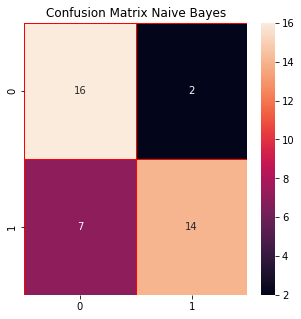

In [95]:
modelPerformace(y_test, y_pred, 'Naive Bayes', True)

**Logistic Regression Model**

In [96]:
y_pred_logidtic = logisticRegressionModel(X_train, y_train, X_test)

Test Result:
Accuracy Score: 0.8205128205128205
F1 Score: 0.815585238371786
Precision: 0.8402366863905326
Recall: 0.8205128205128205



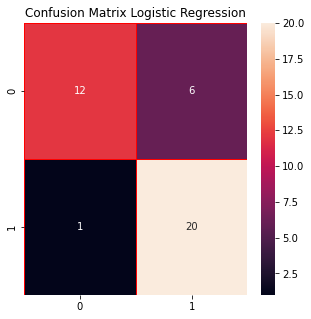

In [97]:
modelPerformace(y_test, y_pred_logidtic, 'Logistic Regression', False)

**Support Vector Machine Model**

In [98]:
y_pred_SVC = SVCModel(X_train, y_train, X_test)

Test Result:
Accuracy Score: 0.46153846153846156
F1 Score: 0.631578947368421
Precision: 0.46153846153846156
Recall: 1.0



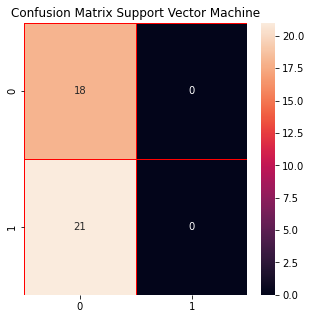

In [99]:
modelPerformace(y_test, y_pred_SVC, 'Support Vector Machine', False)

**Random Forest Model**

In [100]:
y_pred_RandomForest = randomForestModel(X_train, y_train, X_test)

Test Result:
Accuracy Score: 0.8205128205128205
F1 Score: 0.8183372183372183
Precision: 0.8262820512820513
Recall: 0.8205128205128205



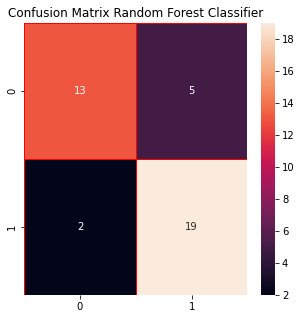

In [101]:
modelPerformace(y_test, y_pred_RandomForest, 'Random Forest Classifier', False)

**K Nearest Neighbors Model**

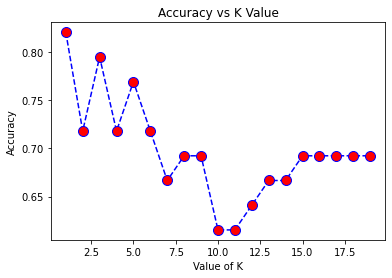

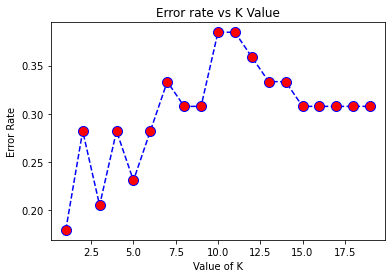


Error rate lowest for K value is:1


In [102]:
y_pred_KNeighbors = KNNModel(X_train, y_train, X_test, y_test)

Test Result:
Accuracy Score: 0.8205128205128205
F1 Score: 0.8183372183372183
Precision: 0.8262820512820513
Recall: 0.8205128205128205



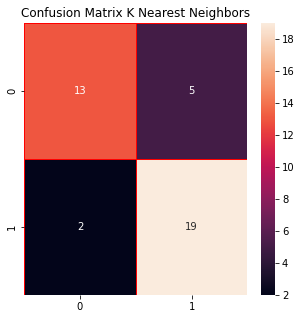

In [103]:
modelPerformace(y_test, y_pred_KNeighbors, 'K Nearest Neighbors', False)

**Multi-Layer Perceptron Neural Networks Model**

In [104]:
NNX = np.array(X)
NNy = np.array(y_underSampler)

In [105]:
# create X and Y datasets for training
from sklearn import model_selection
NNX_train, NNX_test, NNy_train, NNy_test = model_selection.train_test_split(NNX, NNy, stratify=NNy, random_state=42, test_size = 0.2)

In [106]:
nn_pred = NNModel(NNX_train, NNy_train, NNX_test, 10)

Epoch 1/200
16/16 [==============================] - 1s 1ms/step - loss: 1.6897 - accuracy: 0.4967
Epoch 2/200
16/16 [==============================] - 0s 1ms/step - loss: 0.7673 - accuracy: 0.4510
Epoch 3/200
16/16 [==============================] - 0s 1ms/step - loss: 0.7127 - accuracy: 0.5490
Epoch 4/200
16/16 [==============================] - 0s 1ms/step - loss: 0.6704 - accuracy: 0.6144
Epoch 5/200
16/16 [==============================] - 0s 990us/step - loss: 0.6426 - accuracy: 0.6601
Epoch 6/200
16/16 [==============================] - 0s 1ms/step - loss: 0.6085 - accuracy: 0.6993
Epoch 7/200
16/16 [==============================] - 0s 1ms/step - loss: 0.5835 - accuracy: 0.7516
Epoch 8/200
16/16 [==============================] - 0s 1ms/step - loss: 0.5569 - accuracy: 0.7255
Epoch 9/200
16/16 [==============================] - 0s 1ms/step - loss: 0.5310 - accuracy: 0.7582
Epoch 10/200
16/16 [==============================] - 0s 920us/step - loss: 0.5104 - accuracy: 0.7843
Epoch

16/16 [==============================] - 0s 859us/step - loss: 0.2440 - accuracy: 0.8824
Epoch 83/200
16/16 [==============================] - 0s 869us/step - loss: 0.2361 - accuracy: 0.8758
Epoch 84/200
16/16 [==============================] - 0s 994us/step - loss: 0.2310 - accuracy: 0.8889
Epoch 85/200
16/16 [==============================] - 0s 898us/step - loss: 0.2311 - accuracy: 0.8889
Epoch 86/200
16/16 [==============================] - 0s 1ms/step - loss: 0.2239 - accuracy: 0.9020
Epoch 87/200
16/16 [==============================] - 0s 1ms/step - loss: 0.2345 - accuracy: 0.8889
Epoch 88/200
16/16 [==============================] - 0s 994us/step - loss: 0.2411 - accuracy: 0.8693
Epoch 89/200
16/16 [==============================] - 0s 1ms/step - loss: 0.2279 - accuracy: 0.8758
Epoch 90/200
16/16 [==============================] - 0s 1ms/step - loss: 0.2198 - accuracy: 0.8954
Epoch 91/200
16/16 [==============================] - 0s 1ms/step - loss: 0.2224 - accuracy: 0.8824
Epo

16/16 [==============================] - 0s 723us/step - loss: 0.1548 - accuracy: 0.9216
Epoch 163/200
16/16 [==============================] - 0s 916us/step - loss: 0.1561 - accuracy: 0.9216
Epoch 164/200
16/16 [==============================] - 0s 841us/step - loss: 0.1507 - accuracy: 0.9150
Epoch 165/200
16/16 [==============================] - 0s 929us/step - loss: 0.1553 - accuracy: 0.9281
Epoch 166/200
16/16 [==============================] - 0s 991us/step - loss: 0.1479 - accuracy: 0.9150
Epoch 167/200
16/16 [==============================] - 0s 949us/step - loss: 0.1475 - accuracy: 0.9216
Epoch 168/200
16/16 [==============================] - 0s 1ms/step - loss: 0.1500 - accuracy: 0.9346
Epoch 169/200
16/16 [==============================] - 0s 890us/step - loss: 0.1567 - accuracy: 0.9281
Epoch 170/200
16/16 [==============================] - 0s 1ms/step - loss: 0.1482 - accuracy: 0.9216
Epoch 171/200
16/16 [==============================] - 0s 1ms/step - loss: 0.1570 - accurac

Test Result:
Accuracy Score: 0.5128205128205128
F1 Score: 0.6779661016949152
Precision: 0.5128205128205128
Recall: 1.0



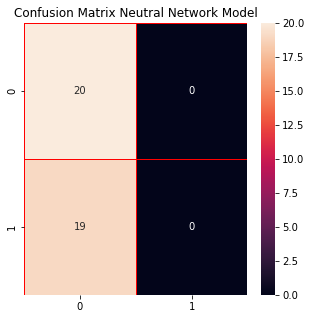

In [107]:
modelPerformace(NNy_test, nn_pred, 'Neutral Network Model', False)

In [108]:
results_classication_df

,Model,Accuracy,F1_Score,Precision,Recall
0,Naive Bayes,0.769231,0.767710,0.792224,0.769231
1,Logistic Regression,0.820513,0.815585,0.840237,0.820513
2,Support Vector Machine,0.461538,0.631579,0.461538,1.000000
3,Random Forest Classifier,0.820513,0.818337,0.826282,0.820513
4,K Nearest Neighbors,0.820513,0.818337,0.826282,0.820513
5,Neutral Network Model,0.512821,0.677966,0.512821,1.000000
